Практическое задание №6

Андрусенко С.Л.

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

Задание №1

Решите линейную систему:

In [5]:
# AX = B
A = np.array([[1,2,3],[4,0,6],[7,8,9]])
print(A)
print(np.linalg.det(A))
B = np.array([12,2,1])
print(B)
np.linalg.solve(A,B)

[[1 2 3]
 [4 0 6]
 [7 8 9]]
59.999999999999986
[12  2  1]


array([-9.2       ,  0.9       ,  6.46666667])

Задание №2

Найдите псевдорешение:

In [7]:
# Запишем систему в матричном виде: AX = B
A = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B = np.array([1,7,12,7,15])
np.linalg.lstsq(A,B)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [12]:
# Полученный вектор значений из МНК: [ 1.13919353, -0.90498444, -0.9009803 ]. Сделаем проверку (посчитаем невязку):
A = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B = np.array([1,7,12,7,15])
X = np.array([1.13919353, -0.90498444, -0.9009803])
print(np.dot(A,X) - B)

[-0.76979505  0.03751835 -0.16349016 -0.21671144  0.21805317]


Задание №3

Сколько решений имеет линейная система:

In [22]:
# Для этого посчитаем ранг матрицы A и ранг расширенной матрицы С и сравним их
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print(A)
print(C)
rgA = np.linalg.matrix_rank(A, 0.0001) 
rgC = np.linalg.matrix_rank(C, 0.0001)
print(rgA, rgC)
if (rgA < rgC):
    print("Система не имеет решений")
else:
    print("Система имеет решения")

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
2 3
Система не имеет решений


In [30]:
# Переделаем тогда систему, чтобы она была совместной:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print(A)
print(C)
rgA = np.linalg.matrix_rank(A, 0.0001) 
rgC = np.linalg.matrix_rank(C, 0.0001)
print(rgA, rgC)
if (rgA < rgC):
    print("Система не имеет решений")
else:
    print("Система имеет решения")

[[1 2 3]
 [4 0 6]
 [7 8 9]]
[[ 1  2  3 12]
 [ 4  0  6  2]
 [ 7  8  9  1]]
3 3
Система имеет решения


Задание №4

Вычислите LU-разложение матрицы:

In [37]:
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
P,L,U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
# проверка: PA = LU
print(np.dot(P.T, A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Задание №5

Найдите нормальное псевдорешение недоопределенной системы:

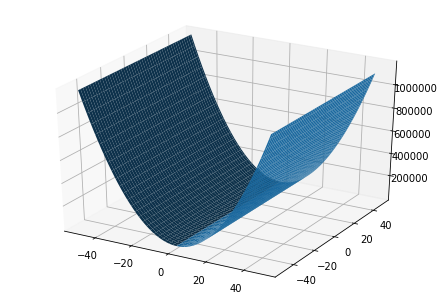

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [38]:
def Q(x, y, z): #норма решения
  return (x**2 + y**2 + z**2)
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
X = np.arange(-50, 50, 1)
Y = np.arange(-50, 50, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Q(X, 5*X - 14, 21*X - 1))
show()
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)